In [4]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

from pandas_datareader import data as web
start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2013-1-27')
f = web.DataReader("F", 'yahoo', start, end)

### Let's find some time series data
hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html

In [5]:
from pandas_datareader import data as web
start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2013-1-27')
f = web.DataReader("F", 'yahoo', start, end)

In [6]:
f.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,10.17,10.28,10.05,10.28,8.201456,60855800
2010-01-05,10.45,11.24,10.40,10.96,8.743967,215620200
2010-01-06,11.21,11.46,11.13,11.37,9.071067,200070600
2010-01-07,11.46,11.69,11.32,11.66,9.302429,130201700
2010-01-08,11.67,11.74,11.46,11.69,9.326366,130463000


### Plot the high and low values of Yahoo's stock for July and August 2012

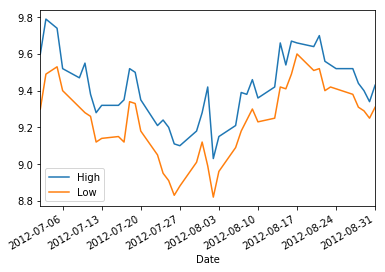

In [14]:
# %load snippets/prac1.py
f.loc['2012-07' : '2012-08', ['High', 'Low']].plot()

### Is the variance of the trading volume relatively stable over time?

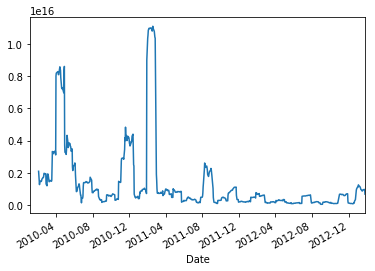

In [15]:
# %load snippets/prac2.py
f.Volume.rolling(window=20).var().plot()

### Is the expanding window variance of the trading volume relatively stable over time?

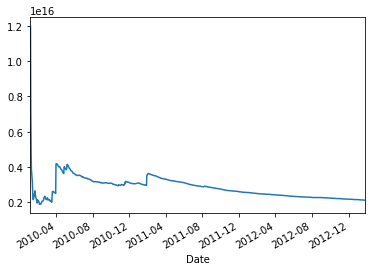

In [17]:
# %load snippets/prac3.py
f.Volume.expanding().var().plot()

### On how many days did the stock close higher than it opened?

Hint: check out .tshift() in the pandas docs
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#shifting-lagging

In [22]:
# %load snippets/prac4.py
up_days = (f.Close > f.Open).sum() # no. of days close > open
print up_days
print up_days / float(len(f.Close)) # proportion of total days in data set

352
0.456549935149


### And did the 'up' days become more or less frequent over time?

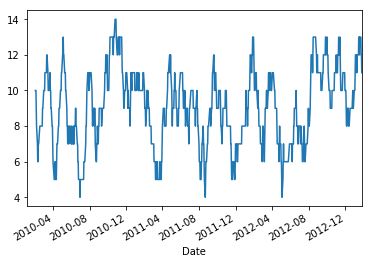

In [23]:
# %load snippets/prac5.py

(f.Close > f.Open).rolling(window = 20).sum().plot()

# cn not see a trend of increasing frequency of 'up' days - looks random

### Compute and plot the mean monthly High value of the stock

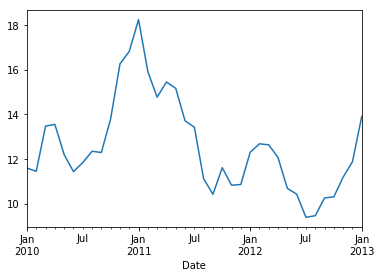

In [27]:
# %load snippets/prac6.py

f.High.resample('M').mean().plot()

### Explore the variance of the differenced volume

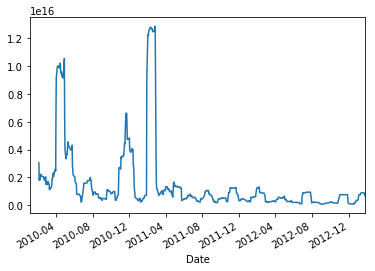

In [28]:
# %load snippets/prac7.py
(f.Volume - f.Volume.shift()).rolling(window=20).var().plot()

### Does the lagged time series correlate with itself?

In [30]:
# %load snippets/prac8.py
pd.DataFrame({'real':f.Volume, 'lagged':f.Volume.shift()}).corr()

,lagged,real
lagged,1.000000,0.656441
real,0.656441,1.000000


In [35]:
# predictor of tomorrow's price: today, yesterday etc.
pd.DataFrame({'day 0':f.Close, 'day 1':f.Close.shift(), 'day 2':f.Close.shift(2), 'day3': f.Close.shift(3)}).corr()

# correnation declines with distance from day 0, so today's price is the best predictor of tomorrow's price

,day 0,day 1,day 2,day3
day 0,1.000000,0.991643,0.982668,0.973407
day 1,0.991643,1.000000,0.991644,0.982664
day 2,0.982668,0.991644,1.000000,0.991639
day3,0.973407,0.982664,0.991639,1.000000
